# Ternary plots

This notebook goes with [a blog post](https://agilescientific.com/blog/2019/3/21/x-lines-of-python-ternary-diagrams).

There's:

- `mpltern`: https://mpltern.readthedocs.io/en/latest/index.html
- `python-ternary`: https://github.com/marcharper/python-ternary
- Plotly Express: https://plotly.com/python/ternary-plots/

And I'm not sure which has the best API... I just tried python-ternary and it's throwing warnings for some basic code.

Possibly Plotly is the most reliable way forward.

But for now the rest of this uses `ternary`

In [1]:
import ternary

## Read data

This dataset is from my doctorate and licensed CC-BY. It represents volume percent of limestone fragments, quartz fragments, and matrix in thin section samples from the Eocene Sobrarbe Formation, Ainsa Basin, Spain.

The data is in a public Google Docs spreadsheet, so we can read it directly from there:

In [1]:
uid = "1r7AYOFEw9RgU0QaagxkHuECvfoegQWp9spQtMV8XJGI"
url = f"https://docs.google.com/spreadsheets/d/{uid}/export?format=csv"

In [2]:
import pandas as pd

df = pd.read_csv(url)

df.head()

,Sample,Lithofacies,Facies Association,Carbonate,Quartz,Matrix,Bioclasts,Authigenic
0,40,5,C,34.3,11.7,0.0,1.0,30.3
1,42,9,D,49.3,6.3,3.7,0.0,17.3
2,43,9,D,15.0,4.7,0.0,40.7,34.0
3,44,9,D,49.0,7.0,0.0,0.0,28.7
4,45,9,D,47.7,8.3,12.3,0.3,19.0


## Data exploration

We can check statistics...

In [3]:
df.describe()

,Sample,Lithofacies,Carbonate,Quartz,Matrix,Bioclasts,Authigenic
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,186.823529,7.450980,34.982353,11.433333,14.513725,3.925490,22.233333
std,104.309483,2.229921,13.174031,7.043484,15.987158,7.271062,8.518161
min,40.000000,5.000000,4.300000,2.700000,0.000000,0.000000,7.700000
25%,87.000000,5.000000,25.000000,6.650000,2.150000,0.000000,17.650000
50%,208.000000,8.000000,34.300000,10.000000,8.000000,1.000000,21.000000
75%,300.500000,9.000000,47.700000,12.400000,24.000000,4.650000,27.350000
max,350.000000,11.000000,57.000000,33.000000,56.700000,40.700000,57.300000


...and we can make cross-plots of the numeric parameters:

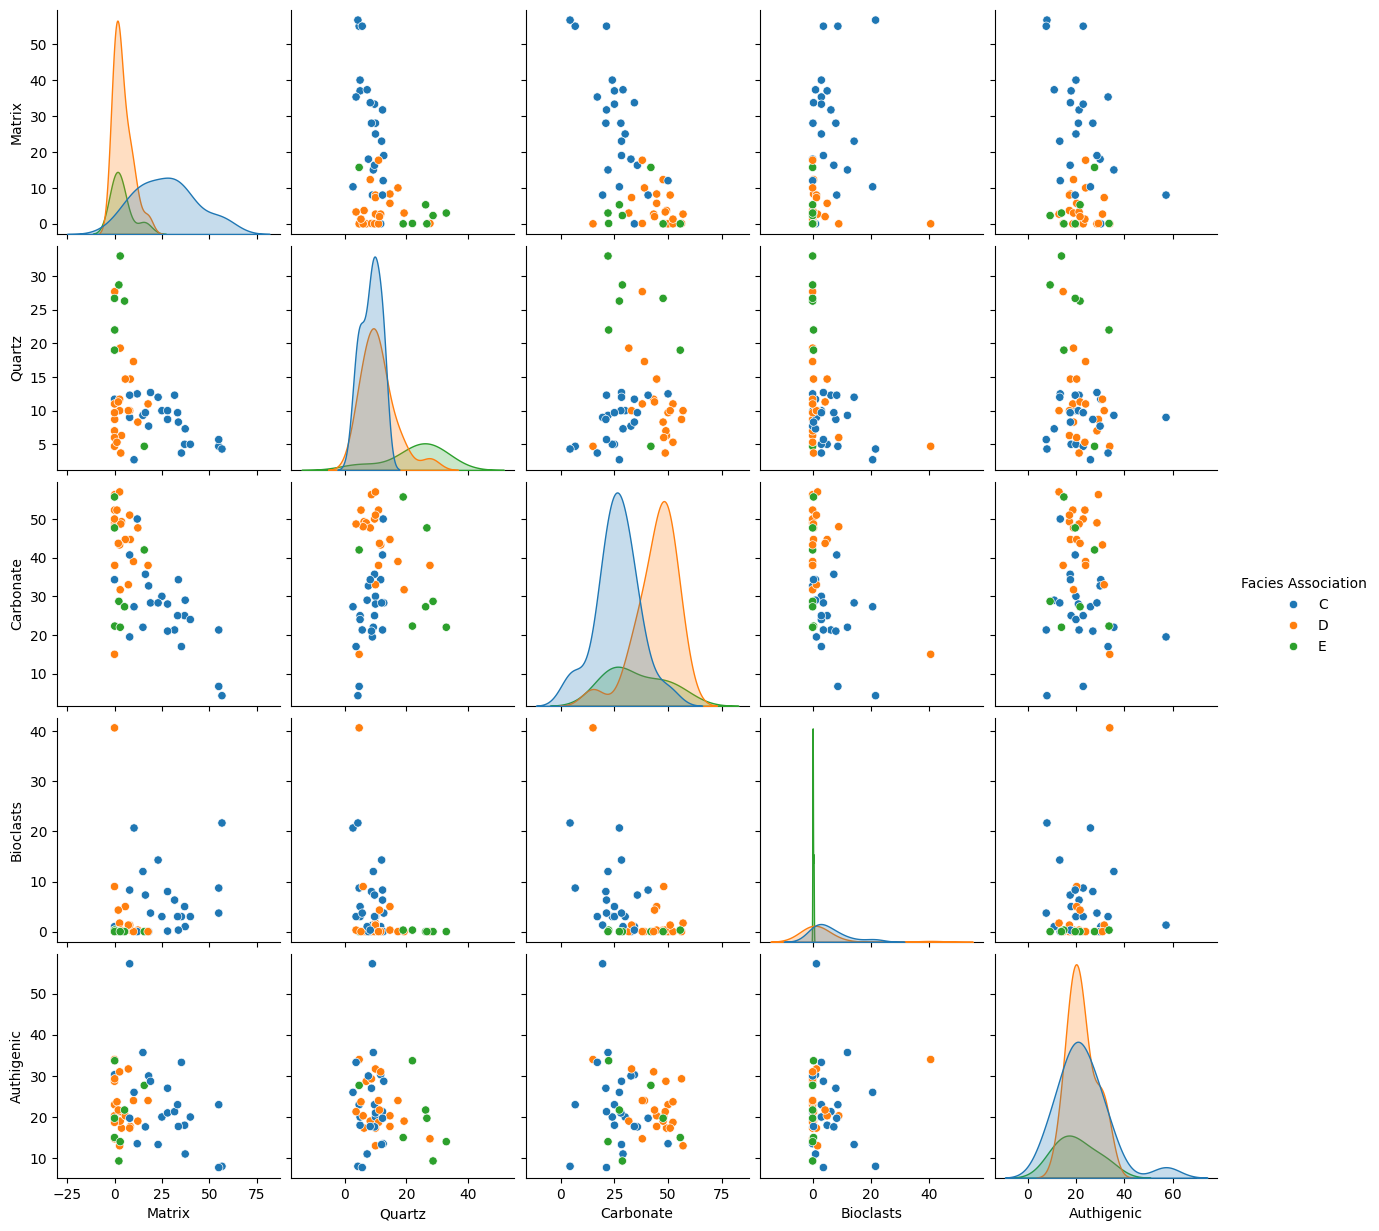

In [10]:
import seaborn as sns

sns.pairplot(df, vars=['Matrix', 'Quartz', 'Carbonate', 'Bioclasts', 'Authigenic'], hue='Facies Association')

## Normalize the data

The data need to be normalized for a ternary plot. We'll normalize to 100:

In [5]:
cols = ['Carbonate', 'Quartz', 'Matrix']

for col in cols:
    df[col[0]] = df[col] * 100 / df[cols].sum(axis=1)

In [6]:
df.head()

,Sample,Lithofacies,Facies Association,Carbonate,Quartz,Matrix,Bioclasts,Authigenic,C,Q,M
0,40,5,C,34.3,11.7,0.0,1.0,30.3,74.565217,25.434783,0.000000
1,42,9,D,49.3,6.3,3.7,0.0,17.3,83.136594,10.623946,6.239460
2,43,9,D,15.0,4.7,0.0,40.7,34.0,76.142132,23.857868,0.000000
3,44,9,D,49.0,7.0,0.0,0.0,28.7,87.500000,12.500000,0.000000
4,45,9,D,47.7,8.3,12.3,0.3,19.0,69.838946,12.152269,18.008785


## Super-minimal scatter plot example

Using `python-ternary` is rather hands-on. In being very flexible &mdash; you can do almost anything with your ternary plot &mdash; the tool is also rather verbose.

That said, we can achieve a minimal ternary plot in six lines of code:

/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


(np.float64(-5.0), np.float64(105.0), np.float64(-10.0), np.float64(90.0))

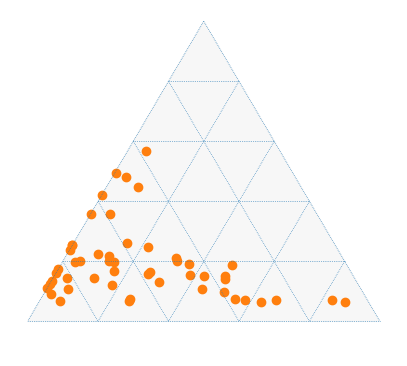

In [21]:
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(5, 4.5)

tax.scatter(df[['M', 'Q', 'C']].values)
tax.gridlines(multiple=20)
tax.get_axes().axis('off')

## A slightly more decorated example

I don't recall ever seeing the axes labeled this way, but just for the sake of illustration...

/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


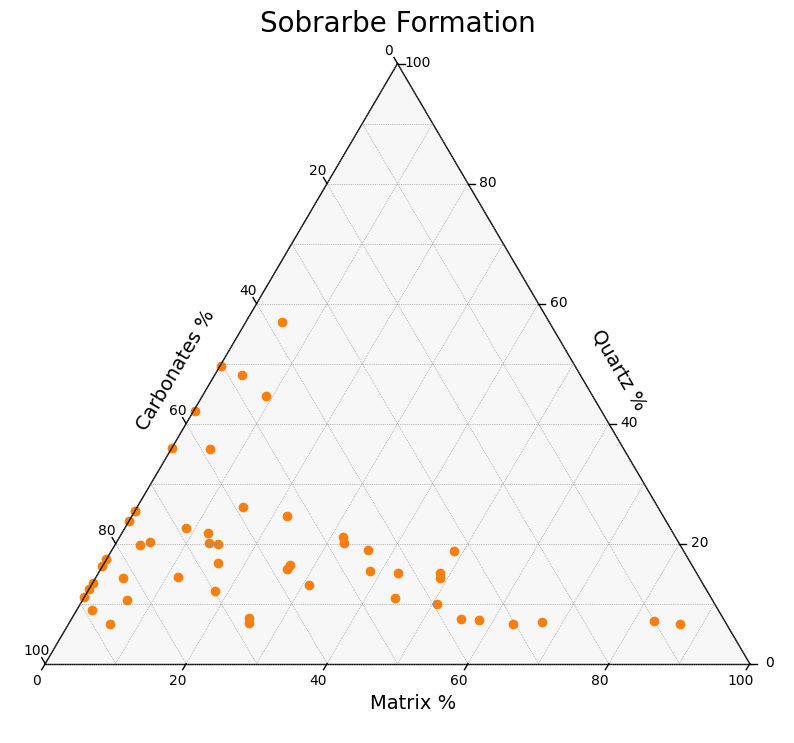

In [22]:
# Set up the figure.
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plot points.
tax.scatter(df[['M', 'Q', 'C']].values)

# Axis labels. (See below for corner labels.)
fontsize = 14
offset = 0.08
tax.left_axis_label("Carbonates %", fontsize=fontsize, offset=offset)
tax.right_axis_label("Quartz %", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Matrix %", fontsize=fontsize, offset=-offset)
tax.set_title("Sobrarbe Formation", fontsize=20)

# Decoration.
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.get_axes().axis('off')

tax.show()

## An even prettier plot

Here's our DataFrame again:

In [23]:
df.head()

,Sample,Lithofacies,Facies Association,Carbonate,Quartz,Matrix,Bioclasts,Authigenic,C,Q,M
0,40,5,C,34.3,11.7,0.0,1.0,30.3,74.565217,25.434783,0.000000
1,42,9,D,49.3,6.3,3.7,0.0,17.3,83.136594,10.623946,6.239460
2,43,9,D,15.0,4.7,0.0,40.7,34.0,76.142132,23.857868,0.000000
3,44,9,D,49.0,7.0,0.0,0.0,28.7,87.500000,12.500000,0.000000
4,45,9,D,47.7,8.3,12.3,0.3,19.0,69.838946,12.152269,18.008785


Let's colour the points by the **Facies Association**.

And let's compute the mean for each of the columns of interest too.

In [24]:
mean= df[['M', 'Q', 'C']].mean(axis=0)
mean

M    22.579065
Q    19.190882
C    58.230053
dtype: float64

Now we can make a plot:

/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/matt/dev/notebooks/.venv/lib/python3.13/site-packages/ternary/helpers.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

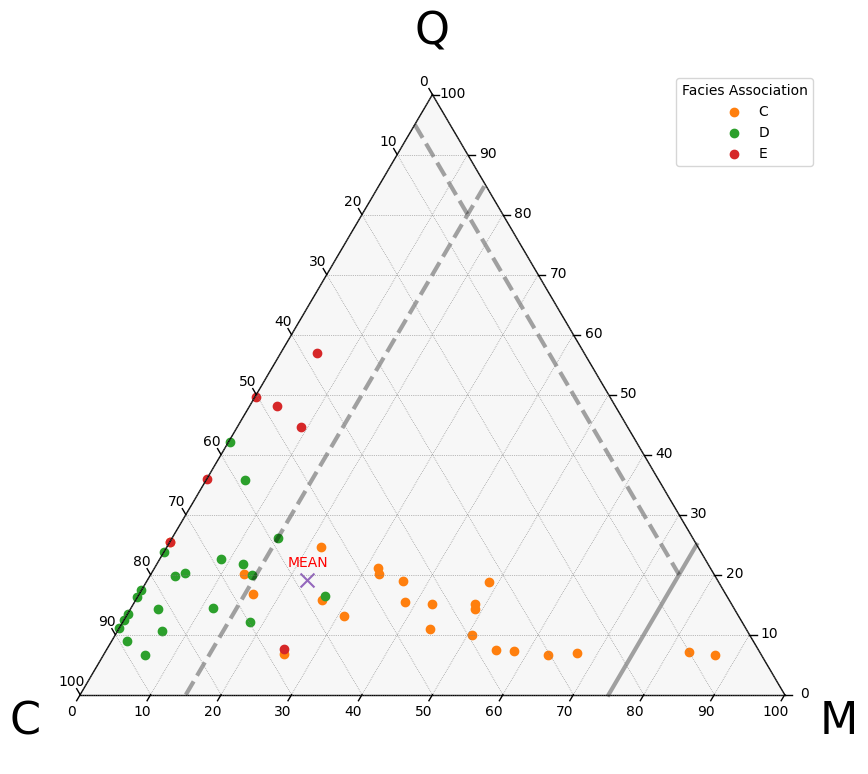

In [25]:
# Set up the figure.
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plot the points in groups.
for name, group in df.groupby('Facies Association'):
    
    # Note that we have to shuffle the order.
    # This will place Q at the top, F on the left.
    # So the column order is: right, top, left.
    points = group[['M', 'Q', 'C']].values
    tax.scatter(points, marker='o', label=name)

# Plot and label the mean.
tax.scatter([mean], marker='x', s=100)
tax.get_axes().text(29.5, 18.5, "MEAN", color='red')

# Draw some lines.
p1, p2 = (75, 25, 0), (75, 0, 25)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")

p1, p2 = (0, 95, 5), (75, 20, 5)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="--")

p1, p2 = (15, 0, 85), (15, 85, 0)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="--")

# Corner labels.
fontsize = 32
offset = 0.1
tax.top_corner_label("Q", fontsize=fontsize, offset=0.2)
tax.left_corner_label("C", fontsize=fontsize, offset=offset)
tax.right_corner_label("M", fontsize=fontsize, offset=offset)

# Decorations.
tax.legend(title="Facies Association")
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.show()

## Fiddle with plot shape

By default the plots are a little too narrow so you have to guess the correct width and height. But we can maybe make it a little easier by computing it. The factor is empirical.

In [26]:
import math
from collections import namedtuple
from typing import NamedTuple

def get_plot_shape(width:float=None, height:float=None) -> NamedTuple:
    """
    Helper function to get correctly shaped ternaries.
    Get size of plot in inches, given at least one of
    width or height. If you give neither, I'll assume
    you want a width of 10 inches. If you give both,
    I'll use width and ignore the height.
    
    One way to use it is like:
    
        fig, tax = ternary.figure(scale=scale)
        fig.set_size_inches(*get_plot_size())
        
    Args:
        width (float): Optional width of plot. Defaults
            to 10 inches.
        height (float): Optional height of plot. Ignored
            if width is also provided.
    
    Returns:
        NamedTuple: The plot (width, height).
    
    Examples
    >>> w, h = get_plot_shape(height=10)
    >>> print(f"width: {w:.2f}, height: {h:.2f}")
    width: 10.79, height: 10.00
    """
    # Derived from theory and experiment...
    f = math.sin(math.radians(60)) * 1.07
    
    if (width is None) and (height is None):
        width = 10
    elif width is None:
        width = height / f
    if height is None:
        height = width * f

    shape = namedtuple('Shape', ['width', 'height'])
    return shape(width, height)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=2)

In [27]:
# Example
w, h = get_plot_shape()
print(f"width: {w:.2f}, height: {h:.2f}")

width: 10.00, height: 9.27


So that's the kind of ratio we can use to get close to an equilateral triangle.

## UPDATE: Plotly Express

[`plotly_express`](https://www.plotly.express/) came along in June 2019.

    pip install plotly_express
    
Then you can do this...

In [9]:
import plotly_express as px

fig = px.scatter_ternary(df,
                         a="Quartz", b="Carbonate", c="Matrix",
                         )
fig.show()

Not bad for one line of code!

### Reference

Hall, M (1997). _Sequence stratigraphy and early diagenesis: the Sobrarbe Formation, Ainsa Basin, Spain_. Doctoral thesis, University of Manchester, September 1997.

<hr />

© 2025 Matt Hall, licensed CC BY-SA